In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split

from sklearn.neighbors import  KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score, plot_confusion_matrix, confusion_matrix
import pickle

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

C:\Users\karth\anaconda3\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [2]:
DATA_PATH = r'C:\Users\karth\Downloads\Crop_recommendation.csv'

In [3]:
data = pd.read_csv(DATA_PATH)
data.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,98,47,42,20.879744,82.002744,6.502985,202.935536,rice
1,99,40,39,21.770462,80.319644,7.038096,226.655537,rice
2,97,55,37,23.004459,82.320763,7.840207,263.964248,rice
3,65,60,36,26.491096,80.158363,6.980401,242.864034,rice
4,72,58,37,20.130175,81.604873,7.628473,262.717340,rice


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


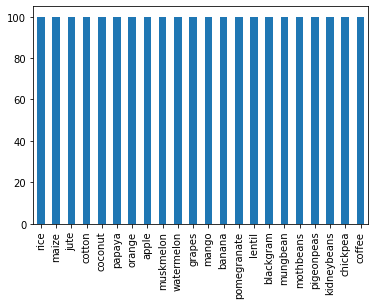

In [5]:
labels = data["label"].unique()
data["label"].value_counts().plot(kind="bar")
plt.show()

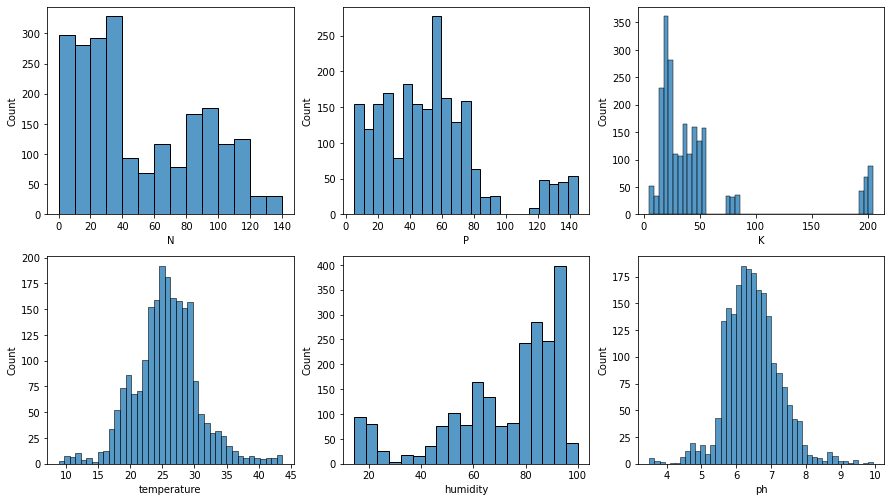

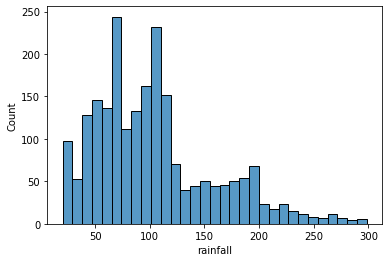

In [6]:
all_columns = data.columns[:-1]

plt.figure(figsize=(15,13))
i = 1
for column in all_columns[:-1]:
    plt.subplot(3,3,i)
    sns.histplot(data[column])
    i+=1
plt.show()

sns.histplot(data[all_columns[-1]])
plt.show()

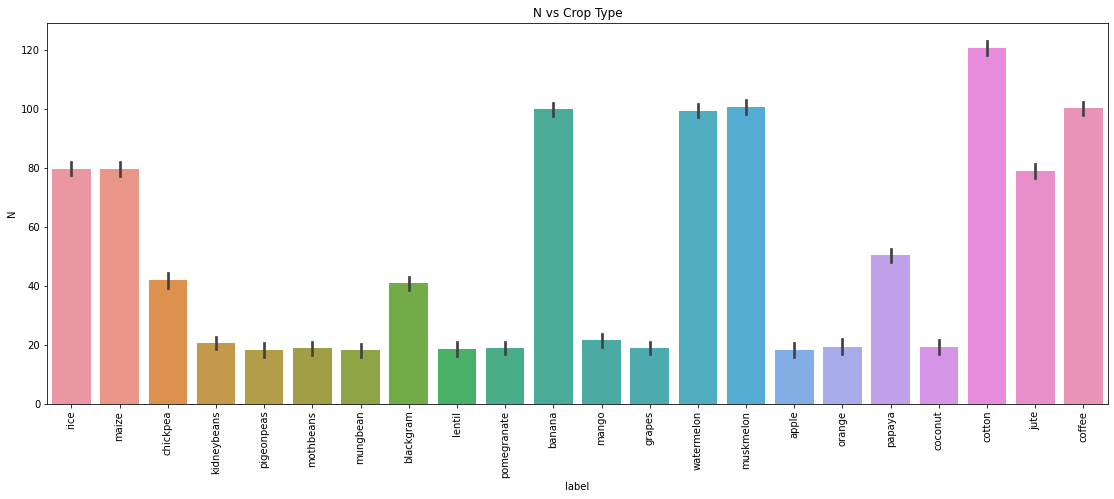

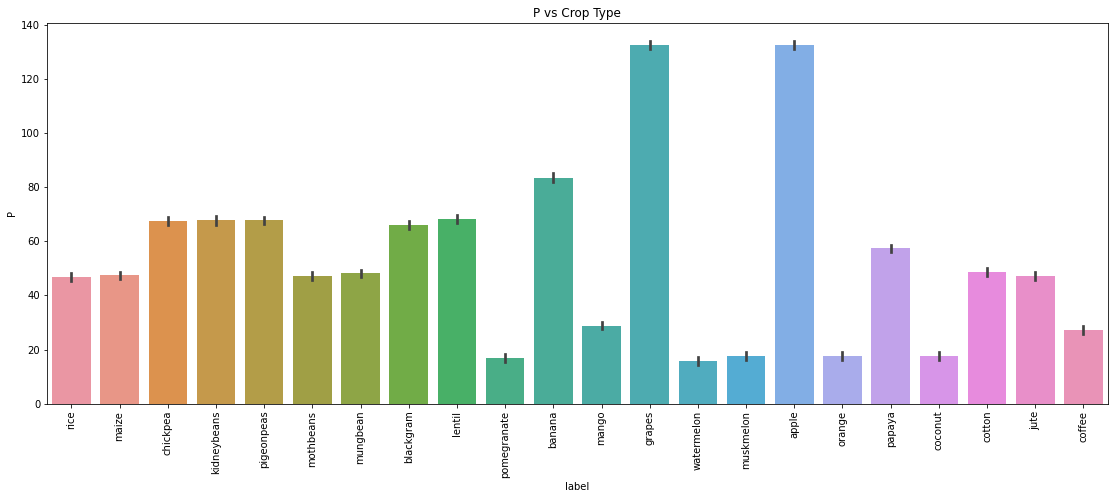

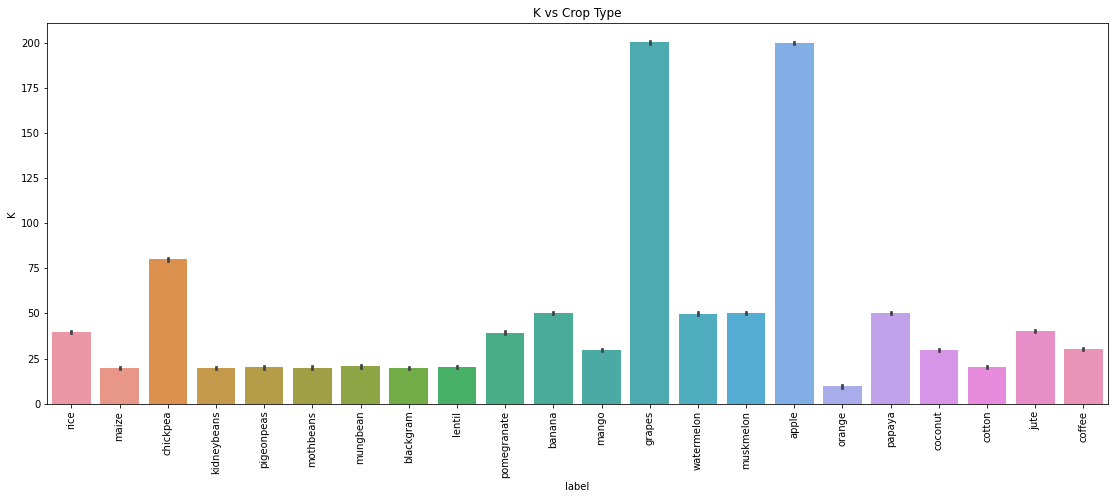

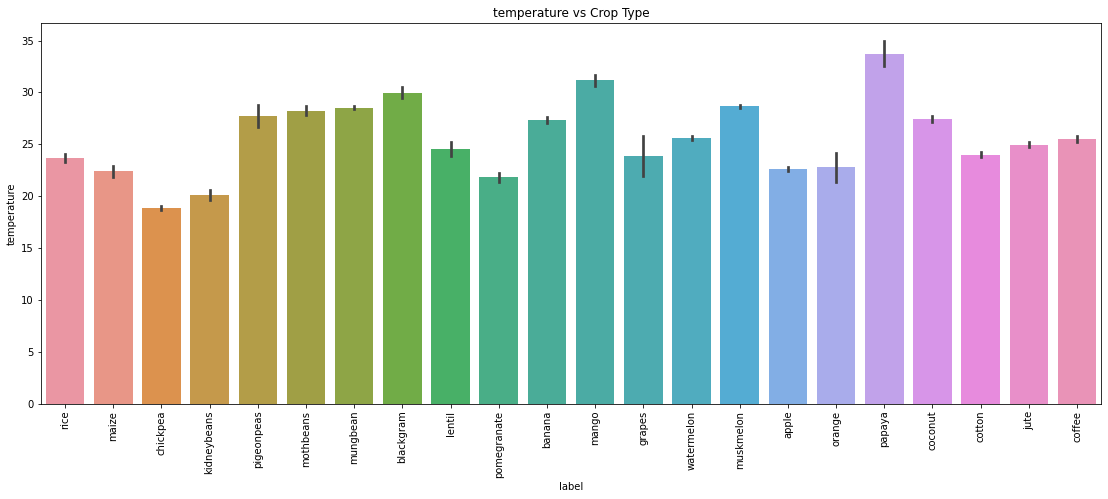

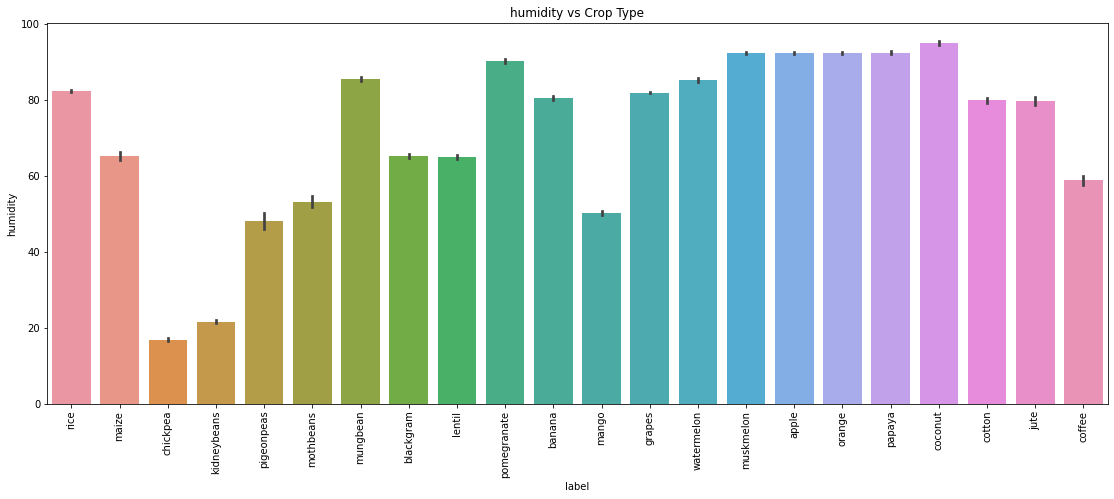

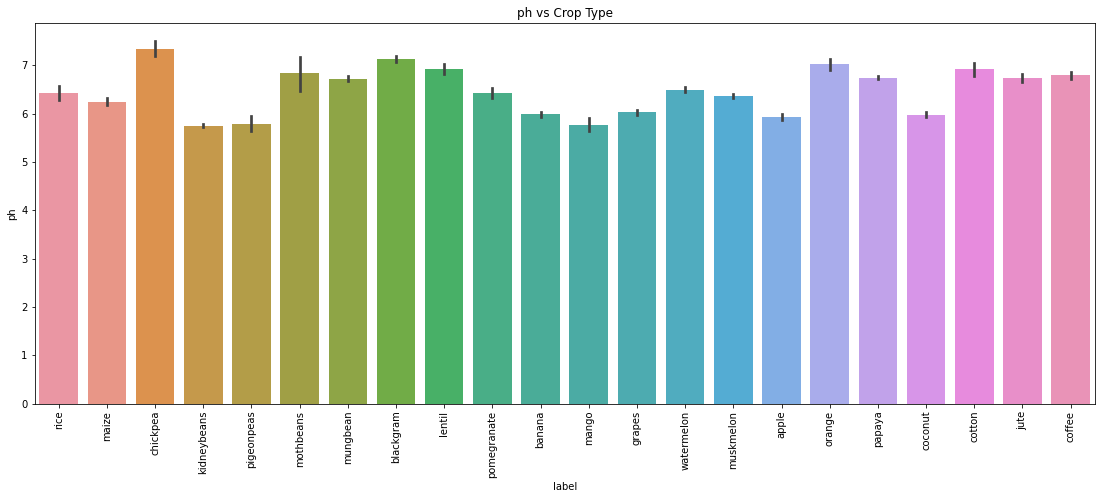

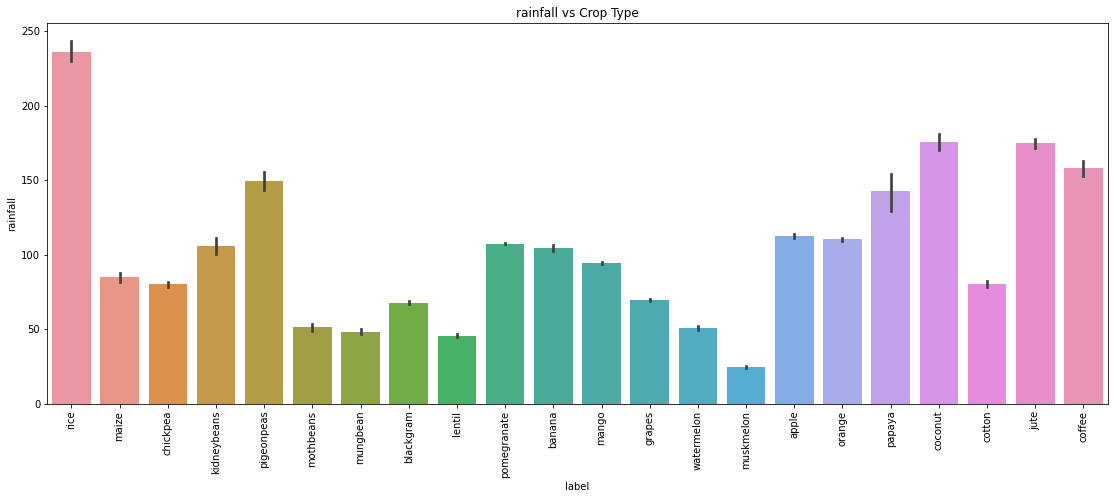

In [7]:
for column in all_columns:
    plt.figure(figsize=(19,7))
    sns.barplot(x = "label", y = column, data = data)
    plt.xticks(rotation=90)
    plt.title(f"{column} vs Crop Type")
    plt.show()

<Figure size 1368x1224 with 0 Axes>

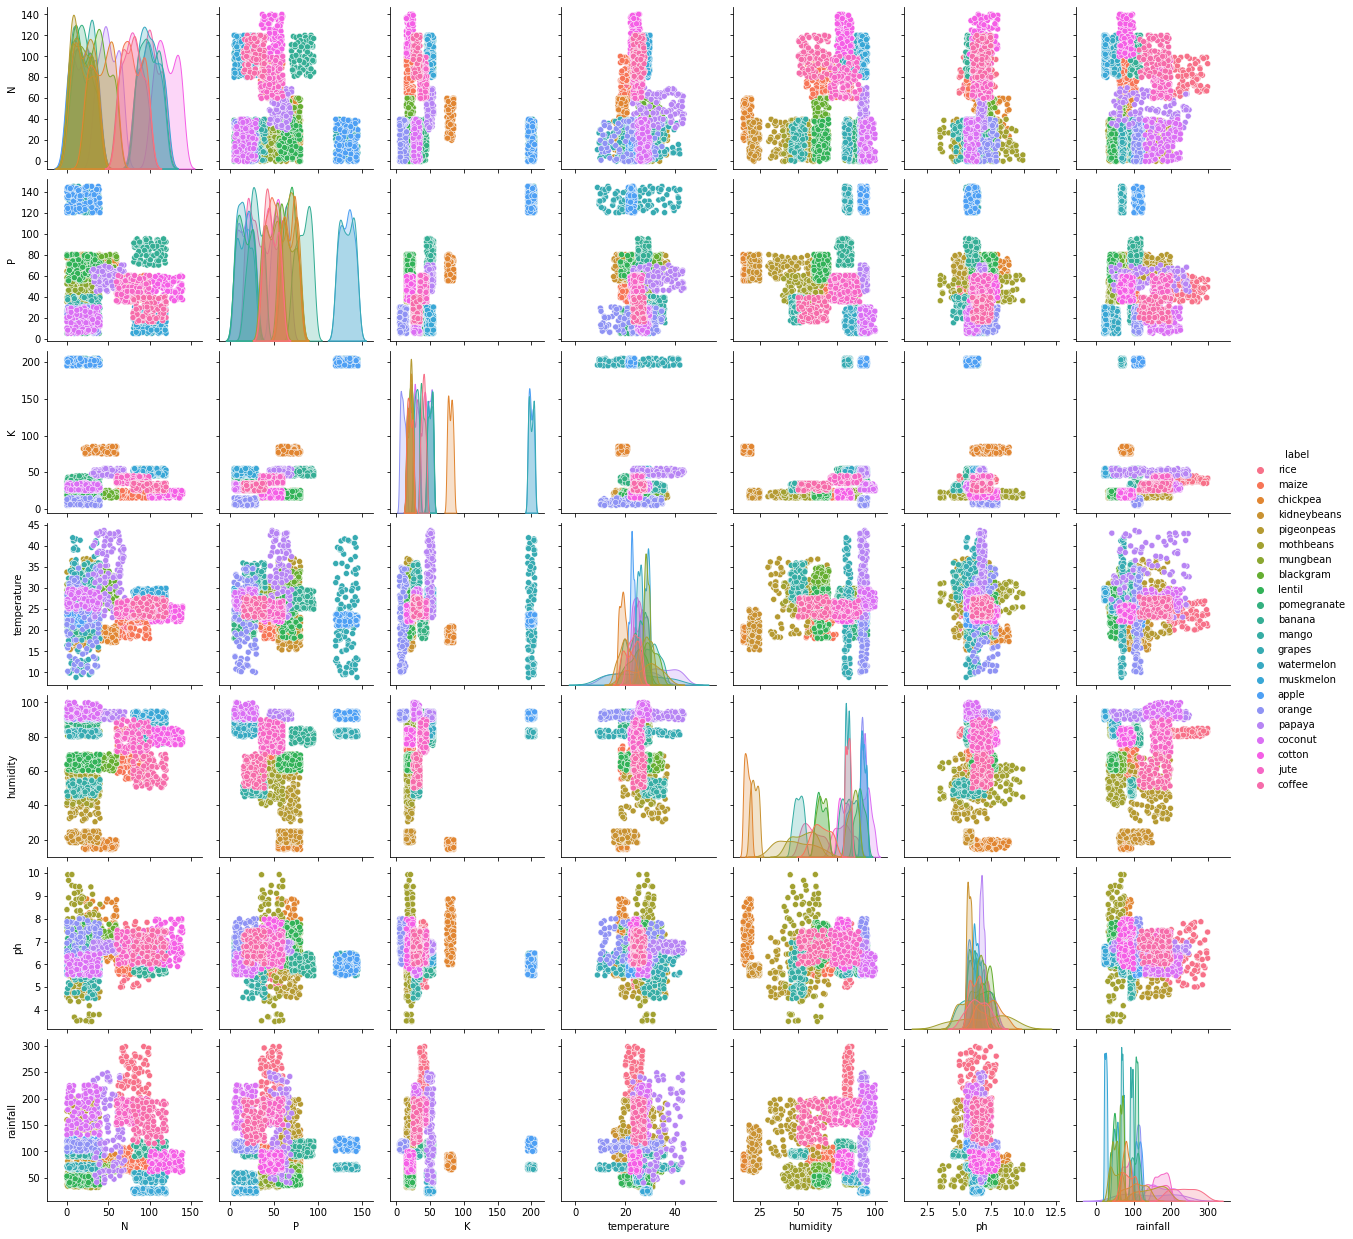

In [8]:
plt.figure(figsize=(19,17))
sns.pairplot(data, hue = "label")
plt.show()

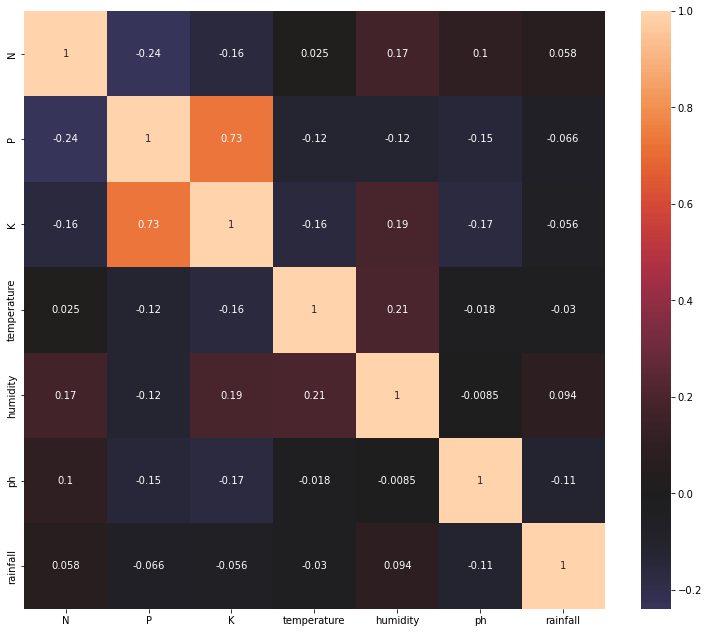

In [9]:
plt.figure(figsize = (13,11))
sns.heatmap(data.corr(), center = 0, annot = True)
plt.show()

In [10]:
label_encoder = LabelEncoder()
X = data[all_columns]
y = label_encoder.fit_transform(data["label"])
print(X.shape, y.shape)

(2200, 7) (2200,)


In [11]:
label_dict = {}
for i in range(22):
    label_dict[i] = label_encoder.inverse_transform([i])[0]
label_dict

{0: 'apple',
 1: 'banana',
 2: 'blackgram',
 3: 'chickpea',
 4: 'coconut',
 5: 'coffee',
 6: 'cotton',
 7: 'grapes',
 8: 'jute',
 9: 'kidneybeans',
 10: 'lentil',
 11: 'maize',
 12: 'mango',
 13: 'mothbeans',
 14: 'mungbean',
 15: 'muskmelon',
 16: 'orange',
 17: 'papaya',
 18: 'pigeonpeas',
 19: 'pomegranate',
 20: 'rice',
 21: 'watermelon'}

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X.values, y, test_size = 0.2, random_state = 0)
print(f"Train Data: {X_train.shape}, {y_train.shape}")
print(f"Train Data: {X_test.shape}, {y_test.shape}")

Train Data: (1760, 7), (1760,)
Train Data: (440, 7), (440,)


Accuracy at k = 1 is 0.975
Accuracy at k = 2 is 0.9681818181818181
Accuracy at k = 3 is 0.9772727272727273
Accuracy at k = 4 is 0.9727272727272728
Accuracy at k = 5 is 0.9795454545454545
Accuracy at k = 6 is 0.9727272727272728
Accuracy at k = 7 is 0.9704545454545455
Accuracy at k = 8 is 0.9681818181818181
Accuracy at k = 9 is 0.9636363636363636
Accuracy at k = 10 is 0.9636363636363636
Accuracy at k = 11 is 0.9613636363636363
Accuracy at k = 12 is 0.9590909090909091
Accuracy at k = 13 is 0.9568181818181818
Accuracy at k = 14 is 0.9522727272727273
Accuracy at k = 15 is 0.9545454545454546
Accuracy at k = 16 is 0.9545454545454546
Accuracy at k = 17 is 0.9522727272727273
Accuracy at k = 18 is 0.9522727272727273
Accuracy at k = 19 is 0.95
Accuracy at k = 20 is 0.9454545454545454
Accuracy at k = 21 is 0.9409090909090909
Accuracy at k = 22 is 0.9431818181818182
Accuracy at k = 23 is 0.9409090909090909
Accuracy at k = 24 is 0.9340909090909091
Accuracy at k = 25 is 0.9272727272727272
Accuracy at

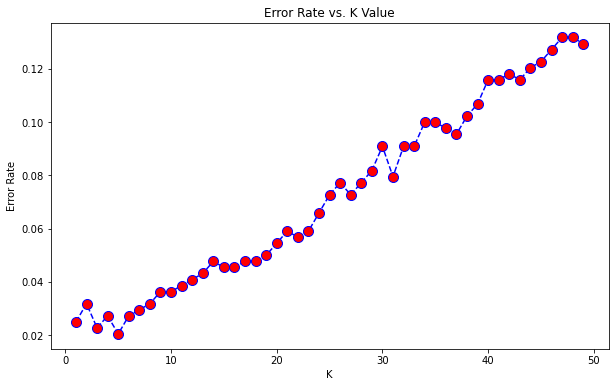

In [13]:
error_rate = []
for i in range(1, 50):
    pipeline = make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors = i))
    pipeline.fit(X_train, y_train)
    predictions = pipeline.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    print(f"Accuracy at k = {i} is {accuracy}")
    error_rate.append(np.mean(predictions != y_test))

plt.figure(figsize=(10,6))
plt.plot(range(1,50),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate))+1)

Accuracy on Test Data: 97.27272727272728%


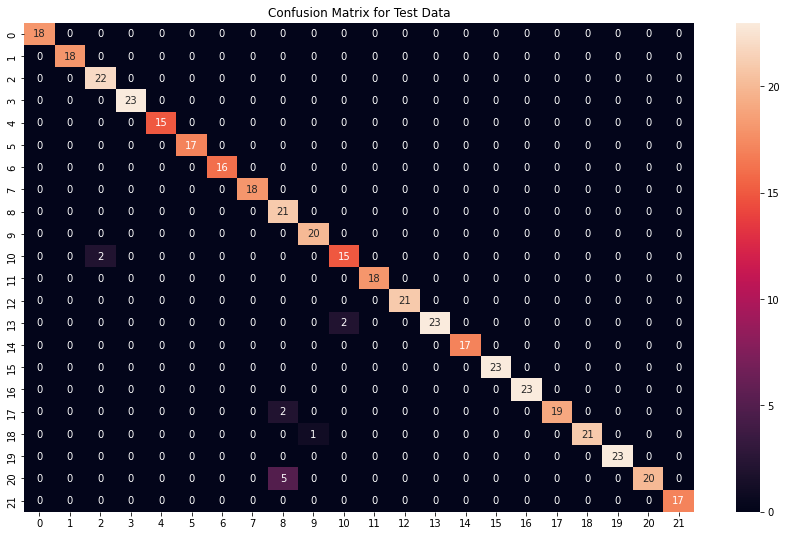


Accuracy on Whole Data: 97.63636363636363%


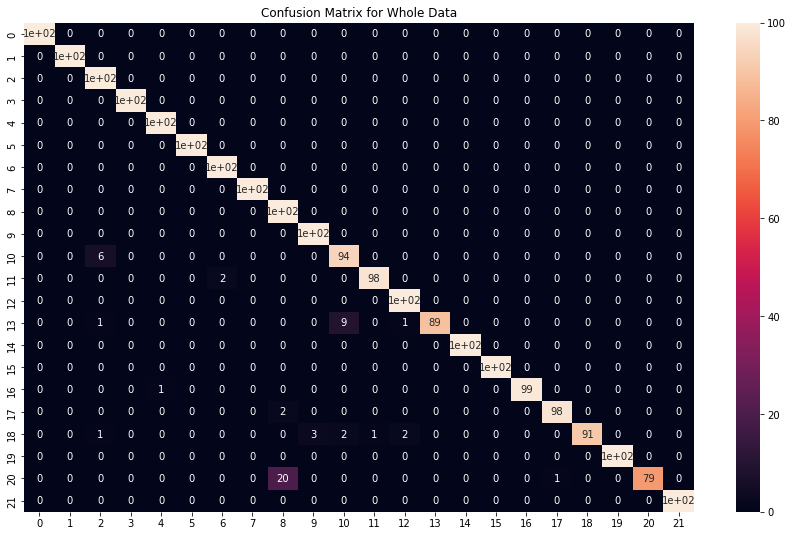

In [14]:
knn_pipeline = make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors = 4))
knn_pipeline.fit(X_train, y_train)

# Test Data Metrics
predictions = knn_pipeline.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy on Test Data: {accuracy*100}%")
plt.figure(figsize = (15,9))
sns.heatmap(confusion_matrix(y_test, predictions), annot = True)
plt.title("Confusion Matrix for Test Data")
plt.show()

print()

# Whole Data Metrics
predictions = knn_pipeline.predict(X.values)
accuracy = accuracy_score(y, predictions)
print(f"Accuracy on Whole Data: {accuracy*100}%")
plt.figure(figsize = (15,9))
sns.heatmap(confusion_matrix(y, predictions), annot = True)
plt.title("Confusion Matrix for Whole Data")
plt.show()


Accuracy on Test Data: 99.54545454545455%


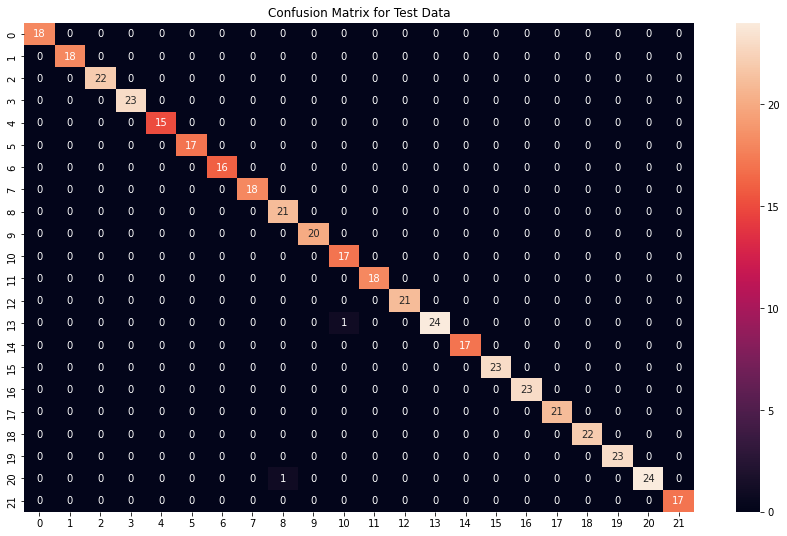


Accuracy on Whole Data: 99.90909090909092%


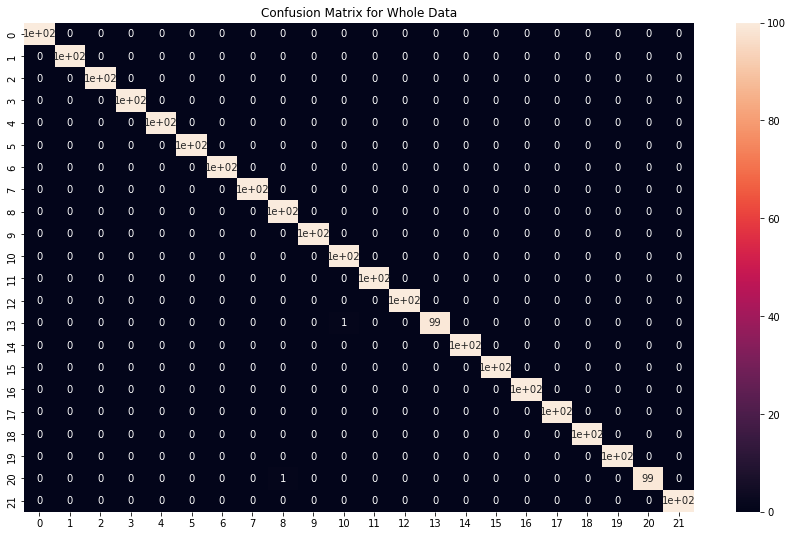

In [15]:
rf_pipeline = make_pipeline(StandardScaler(), RandomForestClassifier(random_state = 18))
rf_pipeline.fit(X_train, y_train)

# Accuray On Test Data
predictions = rf_pipeline.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy on Test Data: {accuracy*100}%")
plt.figure(figsize = (15,9))
sns.heatmap(confusion_matrix(y_test, predictions), annot = True)
plt.title("Confusion Matrix for Test Data")
plt.show()

print()

# Accuray On Whole Data
predictions = rf_pipeline.predict(X.values)
accuracy = accuracy_score(y, predictions)
print(f"Accuracy on Whole Data: {accuracy*100}%")
plt.figure(figsize = (15,9))
sns.heatmap(confusion_matrix(y, predictions), annot = True)
plt.title("Confusion Matrix for Whole Data")
plt.show()

[13:08:28] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy on Test Data: 99.31818181818181%


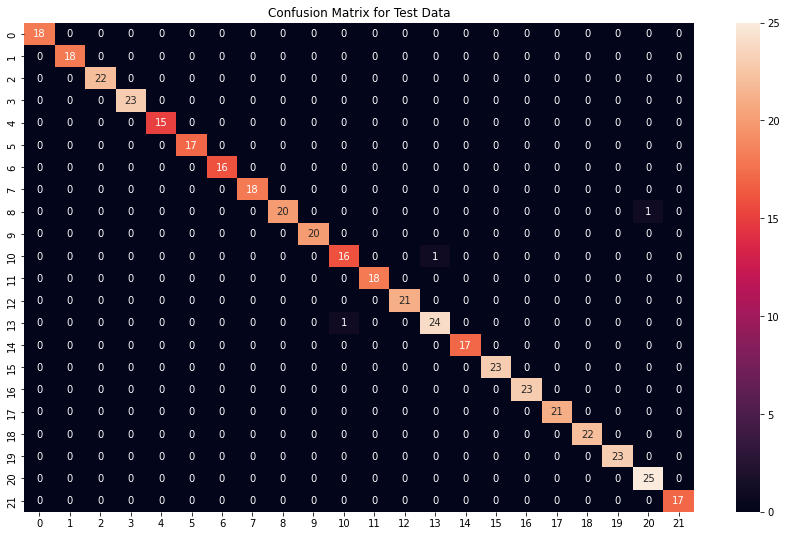


Accuracy on Whole Data: 99.86363636363636%


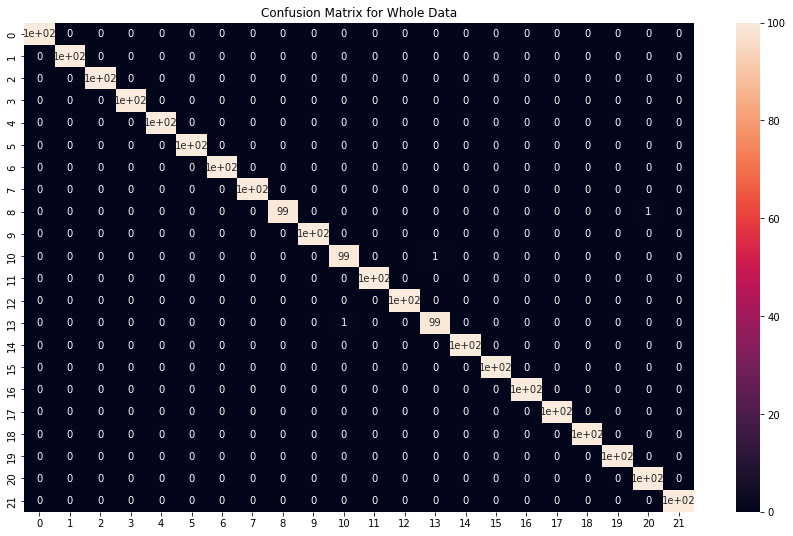

In [16]:
xgb_pipeline = make_pipeline(StandardScaler(), XGBClassifier(random_state = 18))
xgb_pipeline.fit(X_train, y_train)

# Accuray On Test Data
predictions = xgb_pipeline.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy on Test Data: {accuracy*100}%")
plt.figure(figsize = (15,9))
sns.heatmap(confusion_matrix(y_test, predictions), annot = True)
plt.title("Confusion Matrix for Test Data")
plt.show()

print()

# Accuray On Whole Data
predictions = xgb_pipeline.predict(X.values)
accuracy = accuracy_score(y, predictions)
print(f"Accuracy on Whole Data: {accuracy*100}%")
plt.figure(figsize = (15,9))
sns.heatmap(confusion_matrix(y, predictions), annot = True)
plt.title("Confusion Matrix for Whole Data")
plt.show()

In [17]:
print(xgboost.__version__)
import sklearn
print(sklearn.__version__)

1.5.0
1.0.2


In [19]:
pickle.dump(knn_pipeline, open(r"C:\Users\karth\OneDrive\Desktop\work\knn_pipeline.pkl", "wb"))
pickle.dump(rf_pipeline, open(r"C:\Users\karth\OneDrive\Desktop\work\rf_pipeline.pkl", "wb"))
pickle.dump(xgb_pipeline, open(r"C:\Users\karth\OneDrive\Desktop\work\xgb_pipeline.pkl", "wb"))
pickle.dump(label_dict, open(r"C:\Users\karth\OneDrive\Desktop\work\label_dictionary.pkl", "wb"))
print("Saved All Models")

Saved All Models


In [26]:
data = np.array([[104,18, 30, 23.603016, 60.3, 6.7, 140.91]])
prediction = rf_pipeline.predict(data)
print(prediction)

[5]


In [27]:
data = np.array([[83, 45, 60, 28, 70.3, 7.0, 150.9]])
prediction = rf_pipeline.predict(data)
print(prediction)

[8]
